# Decision Trees

**Decision trees** are `supervised learning models used for problems involving classification and regression`. Tree models present a high flexibility that comes at a price: on one hand, `trees are able to capture complex non-linear relationships`; on the other hand, `they are prone to memorizing the noise present in a dataset`. By aggregating the predictions of trees that are trained differently, **ensemble methods** take advantage of the flexibility of trees while reducing their tendency to memorize noise. **Ensemble methods** are used across a variety of fields and have a proven track record of winning many machine learning competitions. 

In this notebook, you'll learn how to use Python to train **decision trees** and **tree-based models** with the user-friendly scikit-learn machine learning library. You'll understand the advantages and shortcomings of trees and demonstrate how ensembling can alleviate these shortcomings, all while practicing on real-world datasets. Finally, you'll also understand how to tune the most influential hyperparameters in order to get the most out of your models.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

path = 'data/dc21/'

## Classification and Regression Trees (CART)

CART are a set of supervised learning models used for problems involving classification and regression. In this chapter, you'll be introduced to the CART algorithm.

<img src="images/tree_class_01.png" alt="" style="width: 400px;"/>

<img src="images/tree_class_02.png" alt="" style="width: 400px;"/>

<img src="images/tree_class_03.png" alt="" style="width: 400px;"/>

<img src="images/tree_class_04.png" alt="" style="width: 400px;"/>


## Train your first classification tree

In this exercise you'll work with the [Wisconsin Breast Cancer Dataset](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data) from the UCI machine learning repository. You'll predict whether a tumor is malignant or benign based on two features: the mean radius of the tumor (`radius_mean`) and its mean number of concave points (`concave points_mean`).

The dataset is already loaded in your workspace and is split into 80% train and 20% test. The feature matrices are assigned to `X_train` and `X_test`, while the arrays of labels are assigned to `y_train` and `y_test` where `class 1` corresponds to a malignant tumor and `class 0` corresponds to a benign tumor. To obtain reproducible results, we also defined a variable called SEED which is set to 1.

In [14]:
X_train = pd.read_csv(path+'X_train.csv', index_col=0)
X_train.head()

,radius_mean,concave points_mean
195,12.91,0.02377
560,14.05,0.04304
544,13.87,0.02369
495,14.87,0.04951
527,12.34,0.02647


In [15]:
y_train = pd.read_csv(path+'y_train.csv', index_col=0)
y_train.head()

,0
195,
560,0
544,0
495,0
527,0
222,0


In [16]:
X_test = pd.read_csv(path+'X_train.csv', index_col=0)
y_test = pd.read_csv(path+'y_train.csv', index_col=0)

In [17]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(454, 2)
(454, 1)
(454, 2)
(454, 1)


In [18]:
SEED = 1

# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=SEED)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

[0 0 0 0 0]


You've just trained your first classification tree! You can see the first five predictions made by the fitted tree on the test set in the console. In the next exercise, you'll evaluate the tree's performance on the entire test set.

## Evaluate the classification tree

Now that you've fit your first classification tree, it's time to `evaluate its performance on the test set`. You'll do so using the **accuracy metric** which corresponds to the fraction of correct predictions made on the test set.

The trained model `dt` from the previous exercise is loaded in your workspace along with the test set features matrix `X_test` and the array of labels `y_test`.

In [19]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_pred, y_test)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.71


## Logistic regression vs classification tree

A **classification tree** divides the feature space into rectangular regions. In contrast, a linear model such as **logistic regression** produces only a single linear decision boundary dividing the feature space into two decision regions.

We have written a custom function called plot_labeled_decision_regions() that you can use to plot the decision regions of a list containing two trained classifiers. You can type help(plot_labeled_decision_regions) in the IPython shell to learn more about this function.

In [20]:
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import  LogisticRegression

# Instatiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)

# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

# Review the decision regions of the two classifiers
#plot_labeled_decision_regions(X_test, y_test, clfs)

/Users/ksatola/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ksatola/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<img src="images/tree_class_05.png" alt="" style="width: 400px;"/>

Notice how the decision boundary produced by logistic regression is linear while the boundaries produced by the classification tree divide the feature space into rectangular regions.

<img src="images/tree_class_06.png" alt="" style="width: 400px;"/>

<img src="images/tree_class_07.png" alt="" style="width: 600px;"/>


## Using entropy as a criterion

In this exercise, you'll train a classification tree on the Wisconsin Breast Cancer dataset using **entropy as an information criterion**. You'll do so using all the 30 features in the dataset, which is split into 80% train and 20% test.

X_train as well as the array of labels y_train are available in your workspace.

In [21]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

## Entropy vs Gini index

In this exercise you'll compare the test set accuracy of `dt_entropy` to the accuracy of another tree named `dt_gini`. The tree `dt_gini` was trained on the same dataset using the same parameters except for the information criterion which was set to the gini index using the keyword `'gini'`.

X_test, y_test, dt_entropy, as well as accuracy_gini which corresponds to the test set accuracy achieved by dt_gini are available in your workspace.

In [22]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)

# Fit dt_entropy to the training set
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [23]:
# Import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

# Use dt_entropy to predict test set labels
y_pred = dt_entropy.predict(X_test)
y_pred2 = dt_gini.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_pred, y_test)
accuracy_gini = accuracy_score(y_pred2, y_test)

# Print accuracy_entropy
print('Accuracy achieved by using entropy: ', accuracy_entropy)

# Print accuracy_gini
print('Accuracy achieved by using the gini index: ', accuracy_gini)

Accuracy achieved by using entropy:  0.7224669603524229
Accuracy achieved by using the gini index:  0.775330396475771


## Decision Trees for Regression

<img src="images/tree_class_08.png" alt="" style="width: 400px;"/>

<img src="images/tree_class_09.png" alt="" style="width: 400px;"/>

<img src="images/tree_class_10.png" alt="" style="width: 400px;"/>


## Train your first regression tree

In this exercise, you'll train a **regression tree** to predict the mpg (miles per gallon) consumption of cars in the auto-mpg dataset using all the six available features.

The dataset is processed for you and is split to 80% train and 20% test. The features matrix X_train and the array y_train are available in your workspace.

In [31]:
df = pd.read_csv(path+'auto.csv')
df.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [32]:
X = df.drop('mpg', axis=1)
y = df['mpg']

In [33]:
X = pd.get_dummies(X)
X.head()

,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,250.0,88,3139,14.5,15.0,0,0,1
1,304.0,193,4732,18.5,20.0,0,0,1
2,91.0,60,1800,16.4,10.0,1,0,0
3,250.0,98,3525,19.0,15.0,0,0,1
4,97.0,78,2188,15.8,10.0,0,1,0


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=1)

In [37]:
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8,
             min_samples_leaf=0.13,
            random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=0.13,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=3, splitter='best')

## Evaluate the regression tree

In this exercise, you will `evaluate the test set performance` of dt using the **Root Mean Squared Error (RMSE)** metric. The RMSE of a model measures, on average, how much the model's predictions differ from the actual labels. The RMSE of a model can be obtained by computing the square root of the model's **Mean Squared Error (MSE)**.

The features matrix X_test, the array y_test, as well as the decision tree regressor dt that you trained in the previous exercise are available in your workspace.

In [38]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

import numpy as np

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_pred, y_test)

# Compute rmse_dt
rmse_dt = np.sqrt(mse_dt)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 4.27


## Linear regression vs regression tree

In this exercise, you'll compare the test set **RMSE** of dt to that achieved by a **linear regression model**. We have already instantiated a linear regression model `lr` and trained it on the same dataset as `dt`.

The features matrix X_test, the array of labels y_test, the trained linear regression model lr, `mean_squared_error` function which was imported under the alias MSE and rmse_dt from the previous exercise are available in your workspace.

In [39]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: lr
lr = LinearRegression()

# Fit lr to the training set
lr.fit(X_train, y_train)

# Compute y_pred
y_pred_lr = lr.predict(X_test)

# Compute mse_dt
mse_lr = MSE(y_pred_lr, y_test)

# Compute rmse_dt
rmse_lr = np.sqrt(mse_lr)

# Print rmse_lr
print("Test set RMSE of lr: {:.2f}".format(rmse_lr))

Test set RMSE of lr: 3.98


## Generalization Error

<img src="images/tree_class_11.png" alt="" style="width: 600px;"/>

<img src="images/tree_class_12.png" alt="" style="width: 600px;"/>

<img src="images/tree_class_13.png" alt="" style="width: 600px;"/>


## Complexity, bias and variance

The complexity of a model labeled f̂ influences the **bias and variance terms** of its **generalization error**. Which of the following correctly describes the relationship between f̂ 's complexity and f̂ 's bias and variance terms?

- As the complexity of f̂  decreases, the bias term decreases while the variance term increases.
- As the complexity of f̂  decreases, both the bias and the variance terms increase.
- As the complexity of f̂  increases, the bias term increases while the variance term decreases.
- As the complexity of f̂  increases, the bias term decreases while the variance term increases. (correct)

## Overfitting and underfitting

In this exercise, you'll visually diagnose whether a model is overfitting or underfitting the training set.

For this purpose, we have trained two different models A and B on the auto dataset to predict the mpg consumption of a car using only the car's displacement (displ) as a feature.

The following figure shows you scatterplots of mpg versus displ along with lines corresponding to the training set predictions of models A and B in red.

<img src="images/tree_class_14.png" alt="" style="width: 600px;"/>

Which of the following statements is true?

- A suffers from high bias and overfits the training set.
- A suffers from high variance and underfits the training set.
- B suffers from high bias and underfits the training set. (correct)
- B suffers from high variance and underfits the training set.

Model B is not able to capture the nonlinear dependence of mpg on displ.

## Instantiate the model

In the following set of exercises, you'll diagnose the **bias and variance problems of a regression tree**. The regression tree you'll define in this exercise will be used to predict the mpg consumption of cars from the auto dataset using all available features.

We have already processed the data and loaded the features matrix X and the array y in your workspace. In addition, the DecisionTreeRegressor class was imported from sklearn.tree.

In [40]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Set SEED for reproducibility
SEED = 1

# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

# Instantiate a DecisionTreeRegressor dt
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.26, random_state=SEED)

## Evaluate the 10-fold CV error

In this exercise, you'll **evaluate the 10-fold CV Root Mean Squared Error (RMSE)** achieved by the regression tree dt that you instantiated in the previous exercise.

In addition to dt, the training data including X_train and y_train are available in your workspace. We also imported cross_val_score from sklearn.model_selection.

Note that since cross_val_score has only the option of evaluating the negative MSEs, its output should be multiplied by negative one to obtain the MSEs.

In [42]:
from sklearn.model_selection import cross_val_score

# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv=10, 
                       scoring='neg_mean_squared_error',
                       n_jobs=-1)

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 5.14


A very good practice is to keep the test set untouched until you are confident about your model's performance. CV is a great technique to get an estimate of a model's performance without affecting the test set.

## Evaluate the training error

You'll now **evaluate the training set RMSE** achieved by the regression tree dt that you instantiated in a previous exercise.

In addition to dt, X_train and y_train are available in your workspace.

In [43]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

Train RMSE: 5.15


Notice how the training error is roughly equal to the 10-folds CV error you obtained in the previous exercice.

## High bias or high variance?

In this exercise you'll diagnose whether the regression tree `dt` you trained in the previous exercise suffers from a bias or a variance problem.

The training set **RMSE (RMSE_train)** and the **CV RMSE (RMSE_CV)** achieved by dt are available in your workspace. In addition, we have also loaded a variable called `baseline_RMSE` which corresponds to the root mean-squared error achieved by the regression-tree trained with the disp feature only (it is the RMSE achieved by the regression tree trained earlier). Here baseline_RMSE serves as the baseline RMSE above which a model is considered to be underfitting and below which the model is considered 'good enough'.

Does dt suffer from a high bias or a high variance problem?

- dt suffers from high variance because RMSE_CV is far less than RMSE_train.
- dt suffers from high bias because RMSE_CV ≈ RMSE_train and both scores are greater than baseline_RMSE. (correct)
- dt is a good fit because RMSE_CV ≈ RMSE_train and both scores are smaller than baseline_RMSE.

dt is indeed underfitting the training set as the model is too constrained to capture the nonlinear dependencies between features and labels.

In [44]:
baseline_RMSE = 5.1

## Ensemble Learning

<img src="images/tree_class_15.png" alt="" style="width: 600px;"/>

<img src="images/tree_class_16.png" alt="" style="width: 600px;"/>

<img src="images/tree_class_17.png" alt="" style="width: 600px;"/>

<img src="images/tree_class_18.png" alt="" style="width: 600px;"/>


## Define the ensemble
In the following set of exercises, you'll work with the [Indian Liver Patient Dataset](https://www.kaggle.com/jeevannagaraj/indian-liver-patient-dataset) from the UCI Machine learning repository.

In this exercise, you'll instantiate three classifiers to predict whether a patient suffers from a liver disease using all the features present in the dataset.

The classes LogisticRegression, DecisionTreeClassifier, and KNeighborsClassifier under the alias KNN are available in your workspace.

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Set seed for reproducibility
SEED=1

# Instantiate lr
lr = LogisticRegression(random_state=SEED)

# Instantiate knn
knn = KNN(n_neighbors=27)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)

# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]

## Evaluate individual classifiers

In this exercise you'll evaluate the performance of the models in the list `classifiers` that we defined in the previous exercise. You'll do so by fitting each classifier on the training set and evaluating its **test set accuracy**.

The dataset is already loaded and preprocessed for you (numerical features are standardized) and it is split into 70% train and 30% test. The features matrices X_train and X_test, as well as the arrays of labels y_train and y_test are available in your workspace. In addition, we have loaded the list classifiers from the previous exercise, as well as the function accuracy_score() from sklearn.metrics.

In [49]:
df = pd.read_csv(path+'indian_liver_patient_preprocessed.csv', index_col=0)
df.head()

,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std,Liver_disease
0,1.247403,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390,0,1
1,1.062306,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461,1,1
2,1.062306,0.640375,0.926017,0.816243,-0.115428,-0.146459,0.478274,0.203446,-0.178707,1,1
3,0.815511,-0.372106,-0.388807,-0.449416,-0.366760,-0.312205,0.293722,0.329431,0.165780,1,1
4,1.679294,0.093956,0.179766,-0.395996,-0.295731,-0.177537,0.755102,-0.930414,-1.713237,1,1


In [50]:
X = df.drop('Liver_disease', axis=1)
y = df['Liver_disease']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=1)

In [51]:
# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_pred, y_test) 
   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

Logistic Regression : 0.767
K Nearest Neighbours : 0.664
Classification Tree : 0.707


/Users/ksatola/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Notice how Logistic Regression achieved the highest accuracy of 76.7%.

## Better performance with a Voting Classifier

Finally, you'll evaluate the performance of a **voting classifier** that takes the outputs of the models defined in the list classifiers and assigns labels by majority voting.

X_train, X_test,y_train, y_test, the list classifiers defined in a previous exercise, as well as the function accuracy_score from sklearn.metrics are available in your workspace.

In [52]:
# Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_pred, y_test)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.741


/Users/ksatola/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Normally, we would expect better performance here, but this time logistic regression performed better.

## Bagging: Bootstrap Aggregation

<img src="images/tree_class_19.png" alt="" style="width: 400px;"/>

<img src="images/tree_class_20.png" alt="" style="width: 400px;"/>

<img src="images/tree_class_21.png" alt="" style="width: 400px;"/>

<img src="images/tree_class_22.png" alt="" style="width: 400px;"/>

<img src="images/tree_class_23.png" alt="" style="width: 400px;"/>

<img src="images/tree_class_24.png" alt="" style="width: 400px;"/>


## Define the bagging classifier

In the following exercises you'll work with the Indian Liver Patient dataset from the UCI machine learning repository. Your task is to predict whether a patient suffers from a liver disease using 10 features including Albumin, age and gender. You'll do so using a **Bagging Classifier**.

In [53]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)

## Evaluate Bagging performance

Now that you instantiated the **bagging classifier**, it's time to train it and evaluate its test set accuracy.

The Indian Liver Patient dataset is processed for you and split into 80% train and 20% test. The feature matrices X_train and X_test, as well as the arrays of labels y_train and y_test are available in your workspace. In addition, we have also loaded the bagging classifier bc that you instantiated in the previous exercise and the function accuracy_score() from sklearn.metrics.

In [55]:
# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 

Test set accuracy of bc: 0.71


## Prepare the ground: OOB - Out Of Bag

<img src="images/tree_class_25.png" alt="" style="width: 400px;"/>

<img src="images/tree_class_26.png" alt="" style="width: 600px;"/>

In the following exercises, you'll compare the **OOB** accuracy to the test set accuracy of a **bagging classifier** trained on the Indian Liver Patient dataset.

In sklearn, you can evaluate the **OOB** accuracy of an ensemble classifier by setting the parameter `oob_score` to True during instantiation. After training the classifier, the OOB accuracy can be obtained by accessing the `.oob_score_` attribute from the corresponding instance.

In your environment, we have made available the class DecisionTreeClassifier from sklearn.tree.

In [56]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, 
            n_estimators=50,
            oob_score=True,
            random_state=1)

## OOB Score vs Test Set Score

Now that you instantiated bc, you will fit it to the training set and evaluate its test set and **OOB** accuracies.

The dataset is processed for you and split into 80% train and 20% test. The feature matrices X_train and X_test, as well as the arrays of labels y_train and y_test are available in your workspace. In addition, we have also loaded the classifier bc instantiated in the previous exercise and the function accuracy_score() from sklearn.metrics.

In [57]:
# Fit bc to the training set 
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_pred, y_test)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy: 0.724, OOB accuracy: 0.687


## Random Forests (RF)

<img src="images/tree_class_27.png" alt="" style="width: 600px;"/>

<img src="images/tree_class_28.png" alt="" style="width: 600px;"/>

<img src="images/tree_class_29.png" alt="" style="width: 600px;"/>

<img src="images/tree_class_30.png" alt="" style="width: 600px;"/>

<img src="images/tree_class_31.png" alt="" style="width: 600px;"/>

<img src="images/tree_class_32.png" alt="" style="width: 600px;"/>


## Train an RF regressor

In the following exercises you'll predict bike rental demand in the Capital Bikeshare program in Washington, D.C using historical weather data from the Bike Sharing Demand dataset available through Kaggle. For this purpose, you will be using the **random forests** algorithm. As a first step, you'll define a random forests regressor and fit it to the training set.

The dataset is processed for you and split into 80% train and 20% test. The features matrix X_train and the array y_train are available in your workspace.

In [58]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
            random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
           oob_score=False, random_state=2, verbose=0, warm_start=False)

## Evaluate the RF regressor

You'll now evaluate the test set **RMSE** of the **random forests regressor** `rf` that you trained in the previous exercise.

The dataset is processed for you and split into 80% train and 20% test. The features matrix X_test, as well as the array y_test are available in your workspace. In addition, we have also loaded the model rf that you trained in the previous exercise.

In [59]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 0.44


## Visualizing features importances

In this exercise, you'll determine which features were the most predictive according to the **random forests regressor** `rf` that you trained in a previous exercise.

For this purpose, you'll draw a **horizontal barplot** of the feature importance as assessed by `rf`. Fortunately, this can be done easily thanks to plotting capabilities of pandas.

We have created a pandas.Series object called `importances` containing the feature names as index and their importances as values. In addition, matplotlib.pyplot is available as plt and pandas as pd.

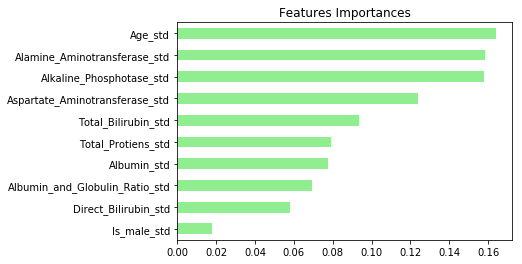

In [60]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show();

## Boosting

<img src="images/tree_class_33.png" alt="" style="width: 600px;"/>

<img src="images/tree_class_34.png" alt="" style="width: 400px;"/>

<img src="images/tree_class_35.png" alt="" style="width: 600px;"/>

<img src="images/tree_class_36.png" alt="" style="width: 600px;"/>

<img src="images/tree_class_37.png" alt="" style="width: 400px;"/>


## Define the AdaBoost classifier

In the following exercises you'll revisit the Indian Liver Patient dataset which was introduced in a previous chapter. Your task is to predict whether a patient suffers from a liver disease using 10 features including Albumin, age and gender. However, this time, you'll be training an **AdaBoost ensemble** to perform the classification task. In addition, given that this dataset is imbalanced, you'll be using the **ROC AUC** score as a metric instead of accuracy.

As a first step, you'll start by instantiating an **AdaBoost classifier**.

In [61]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# Instantiate dt
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

# Instantiate ada
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=180, random_state=1)

## Train the AdaBoost classifier

Now that you've instantiated the **AdaBoost classifier** `ada`, it's time train it. You will also predict the probabilities of obtaining the positive class in the test set. This can be done as follows:

Once the classifier `ada` is trained, call the `.predict_proba()` method by passing `X_test` as a parameter and extract these probabilities by slicing all the values in the second column as follows: `ada.predict_proba(X_test)[:,1]`.

The Indian Liver dataset is processed for you and split into 80% train and 20% test. Feature matrices X_train and X_test, as well as the arrays of labels y_train and y_test are available in your workspace. In addition, we have also loaded the instantiated model ada from the previous exercise.

In [62]:
# Fit ada to the training set
ada.fit(X_train, y_train)

# Compute the probabilities of obtaining the positive class
y_pred_proba = ada.predict_proba(X_test)[:,1]

## Evaluate the AdaBoost classifier

Now that you're done training ada and predicting the probabilities of obtaining the positive class in the test set, it's time to evaluate ada's **ROC AUC** score. Recall that the **ROC AUC** score of a binary classifier can be determined using the `roc_auc_score()` function from sklearn.metrics.

The arrays y_test and y_pred_proba that you computed in the previous exercise are available in your workspace.

In [63]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Evaluate test-set roc_auc_score
ada_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(ada_roc_auc))

ROC AUC score: 0.64


## Gradient Boost

<img src="images/tree_class_38.png" alt="" style="width: 600px;"/>

<img src="images/tree_class_39.png" alt="" style="width: 600px;"/>

<img src="images/tree_class_40.png" alt="" style="width: 600px;"/>


## Define the GB regressor

You'll now revisit the Bike Sharing Demand dataset that was introduced earlier. Recall that your task is to predict the bike rental demand using historical weather data from the Capital Bikeshare program in Washington, D.C.. For this purpose, you'll be using a **gradient boosting regressor**.

As a first step, you'll start by instantiating a **gradient boosting regressor** which you will train in the next exercise.

In [64]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate gb
gb = GradientBoostingRegressor(max_depth=4, 
            n_estimators=200,
            random_state=2)

## Train the GB regressor

You'll now train the **gradient boosting regressor** `gb` that you instantiated in the previous exercise and predict test set labels.

The dataset is split into 80% train and 20% test. Feature matrices X_train and X_test, as well as the arrays y_train and y_test are available in your workspace. In addition, we have also loaded the model instance gb that you defined in the previous exercise.

In [65]:
# Fit gb to the training set
gb.fit(X_train, y_train)

# Predict test set labels
y_pred = gb.predict(X_test)

## Evaluate the GB regressor

Now that the test set predictions are available, you can use them to evaluate the test set **Root Mean Squared Error (RMSE)** of `gb`.

y_test and predictions y_pred are available in your workspace.

In [66]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute MSE
mse_test = MSE(y_test, y_pred)

# Compute RMSE
rmse_test = mse_test**(1/2)

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))

Test set RMSE of gb: 0.446


## Stochastic Gradient Boosting

<img src="images/tree_class_41.png" alt="" style="width: 600px;"/>

<img src="images/tree_class_42.png" alt="" style="width: 600px;"/>

<img src="images/tree_class_43.png" alt="" style="width: 600px;"/>


## Regression with SGB

You'll be working with the Bike Sharing Demand dataset. In the following set of exercises, you'll solve this bike count regression problem using **stochastic gradient boosting**.

In [67]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate sgbr
sgbr = GradientBoostingRegressor(max_depth=4, 
            subsample=0.9,
            max_features=0.75,
            n_estimators=200,                                
            random_state=2)

## Train the SGB regressor

In this exercise, you'll train the *SGBR* `sgbr` instantiated in the previous exercise and predict the test set labels.

The bike sharing demand dataset is already loaded processed for you; it is split into 80% train and 20% test. The feature matrices X_train and X_test, the arrays of labels y_train and y_test, and the model instance sgbr that you defined in the previous exercise are available in your workspace.

In [68]:
# Fit sgbr to the training set
sgbr.fit(X_train, y_train)

# Predict test set labels
y_pred = sgbr.predict(X_test)

## Evaluate the SGB regressor

You have prepared the ground to determine the test set **RMSE** of `sgbr` which you shall evaluate in this exercise.

y_pred and y_test are available in your workspace.

In [69]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute test set MSE
mse_test = MSE(y_test, y_pred)

# Compute test set RMSE
rmse_test = mse_test**(1/2)

# Print rmse_test
print('Test set RMSE of sgbr: {:.3f}'.format(rmse_test))

Test set RMSE of sgbr: 0.439


## Hyperparameters Tuning

<img src="images/tree_class_44.png" alt="" style="width: 600px;"/>

<img src="images/tree_class_45.png" alt="" style="width: 600px;"/>

<img src="images/tree_class_46.png" alt="" style="width: 600px;"/>

<img src="images/tree_class_47.png" alt="" style="width: 600px;"/>

<img src="images/tree_class_48.png" alt="" style="width: 600px;"/>


## Set the tree's hyperparameter grid

In this exercise, you'll manually set the grid of hyperparameters that will be used to tune the classification tree `dt` and find the optimal classifier in the next exercise.

In [70]:
# Define params_dt
params_dt = {'max_depth' : [2, 3, 4], 'min_samples_leaf': [0.12, 0.14, 0.16, 0.18]}

## Search for the optimal tree

In this exercise, you'll perform **grid search using 5-fold cross validation** to find dt's optimal hyperparameters. Note that because grid search is an exhaustive process, it may take a lot time to train the model. Here you'll only be instantiating the `GridSearchCV` object without fitting it to the training set. You can train such an object similar to any scikit-learn estimator by using the `.fit()` method: `grid_object.fit(X_train, y_train)`.

An untuned classification tree `dt` as well as the dictionary `params_dt` that you defined in the previous exercise are available in your workspace.

In [75]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Instantiate grid_dt
grid_dt = GridSearchCV(estimator=dt,
                       param_grid=params_dt,
                       scoring='roc_auc',
                       cv=5,
                       n_jobs=-1)

grid_dt.fit(X_train, y_train)

/Users/ksatola/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [2, 3, 4], 'min_samples_leaf': [0.12, 0.14, 0.16, 0.18]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

## Evaluate the optimal tree

In this exercise, you'll evaluate the test set **ROC AUC score** of grid_dt's optimal model.

The dataset is already loaded and processed for you (numerical features are standardized); it is split into 80% train and 20% test. X_test, y_test are available in your workspace. In addition, we have also loaded the trained GridSearchCV object grid_dt that you instantiated in the previous exercise. Note that grid_dt was trained as follows: `grid_dt.fit(X_train, y_train)`.

In [76]:
# Import roc_auc_score from sklearn.metrics
from sklearn.metrics import roc_auc_score

# Extract the best estimator
best_model = grid_dt.best_estimator_

# Predict the test set probabilities of the positive class
y_pred_proba = grid_dt.predict_proba(X_test)[:,1]

# Compute test_roc_auc
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.731


## Set the hyperparameter grid of RF

In this exercise, you'll manually set the grid of hyperparameters that will be used to tune rf's hyperparameters and find the optimal regressor. For this purpose, you will be constructing a grid of hyperparameters and tune the number of estimators, the maximum number of features used when splitting each node and the minimum number of samples (or fraction) per leaf.

In [77]:
# Define the dictionary 'params_rf'
params_rf = {'n_estimators' : [100, 350, 500], 
             'max_features' : ['log2', 'auto', 'sqrt'], 
             'min_samples_leaf' : [2, 10, 30]}

## Search for the optimal forest

In this exercise, you'll perform grid search using **3-fold cross validation** to find rf's optimal hyperparameters. To evaluate each model in the grid, you'll be using the `negative mean squared error` metric.

Note that because grid search is an exhaustive search process, it may take a lot time to train the model. Here you'll only be instantiating the `GridSearchCV` object without fitting it to the training set. You can train such an object similar to any scikit-learn estimator by using the `.fit()` method: `grid_object.fit(X_train, y_train)`.

The untuned random forests regressor model rf as well as the dictionary params_rf that you defined in the previous exercise are available in your workspace.

In [78]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)

## Evaluate the optimal forest

In this last exercise, you'll evaluate the test set **RMSE** of grid_rf's optimal model.

The dataset is already loaded and processed for you and is split into 80% train and 20% test. In your environment are available X_test, y_test and the function mean_squared_error from sklearn.metrics under the alias MSE. In addition, we have also loaded the trained GridSearchCV object grid_rf that you instantiated in the previous exercise. Note that grid_rf was trained as follows: `grid_rf.fit(X_train, y_train)`.

In [80]:
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  66 out of  81 | elapsed:    3.2s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    3.7s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
           oob_score=False, random_state=2, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 350, 500], 'max_features': ['log2', 'auto', 'sqrt'], 'min_samples_leaf': [2, 10, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [81]:
# Import mean_squared_error from sklearn.metrics as MSE 
from sklearn.metrics import mean_squared_error as MSE

# Extract the best estimator
best_model = grid_rf.best_estimator_

# Predict test set labels
y_pred = best_model.predict(X_test)

# Compute rmse_test
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(rmse_test)) 

Test RMSE of best model: 0.412
